# 고객 이탈 예측 실습 과제

이 노트북은 통신사 고객 이탈 예측 문제를 해결하기 위한 머신러닝 실습 과제입니다.  
의사결정트리(Decision Tree)와 서포트 벡터 머신(SVM)을 활용하며, 의사결정트리는 시각화도 함께 진행합니다.

---

## 📂 데이터셋 다운로드 방법
1. [Kaggle Telco Customer Churn Dataset 링크](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)에 접속합니다.
2. `Download` 버튼을 클릭해 데이터셋을 내려받습니다.
3. 압축을 해제하고 `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 현재 노트북과 같은 폴더에 둡니다.

---

## 🧪 실습 과제 목록


### 🧩 1. 데이터 불러오기 및 확인
- `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 불러오고 `head()`로 데이터를 확인하세요.

In [3]:
import pandas as pd
df = pd.read_csv("/Users/jiyeonpark/Desktop/생성AI부트캠프/Mission/캐글데이터/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 🧩 2. 데이터 전처리
- TotalCharges가 문자열로 되어 있는 문제를 해결하고, 결측값을 처리하세요.
- `Churn` 컬럼을 0과 1로 변환하고, `customerID` 컬럼을 제거하세요.
- 범주형 변수들을 원핫 인코딩 처리하세요.
- 훈련용과 테스트용 데이터로 7:3 비율로 분리하세요.

In [4]:
df.info()
df['TotalCharges'].dtype
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#숫자로 변환 시도 , 변환되지 않는 값은 NaN으로 처리 
#errors 파라미터 : 숫자로 변환이 안되는 값이 있을 때 어떻게 처리할지를 정하는 옵션. 
#처리 방법 : raise/ coerce/ ignor 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [31]:
#결측값 확인
df['TotalCharges'].isna().sum()
# df['TotalCharges'].dtype
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
#- `Churn` 컬럼을 0과 1로 변환하고, `customerID` 컬럼을 제거

df['Churn'] = df['Churn'].map({'Yes': 1, 'No' : 0})
df.drop(columns=['customerID'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [7]:
# 범주형 변수들을 원핫 인코딩 
df = pd.get_dummies(df, drop_first=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [8]:
# - 훈련용과 테스트용 데이터로 7:3 비율로 분리하기
# 훈련/테스트 셋 분리
from sklearn.model_selection import train_test_split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
print("훈련 데이터")
print(X_train.info())
print(y_train.value_counts())

print("\n테스트 데이터")
print(X_test.info())
print(y_test.value_counts()) 



훈련 데이터
<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1695 to 860
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          4930 non-null   int64  
 1   tenure                                 4930 non-null   int64  
 2   MonthlyCharges                         4930 non-null   float64
 3   TotalCharges                           4922 non-null   float64
 4   gender_Male                            4930 non-null   bool   
 5   Partner_Yes                            4930 non-null   bool   
 6   Dependents_Yes                         4930 non-null   bool   
 7   PhoneService_Yes                       4930 non-null   bool   
 8   MultipleLines_No phone service         4930 non-null   bool   
 9   MultipleLines_Yes                      4930 non-null   bool   
 10  InternetService_Fiber optic            4930 non-null   bool   
 11  

#### ✅ 해설:
- TotalCharges 컬럼에는 공백이 포함된 값이 있어, 숫자형으로 변환하기 전에 해당 행을 제거
- Churn은 이진 분류 문제이므로 "Yes"는 1, "No"는 0으로 매핑하여 숫자형으로 변환
- customerID는 단순 식별자 역할을 하므로, 예측 모델 학습에 필요 없어 제거.
- 범주형 변수는 get_dummies()를 사용해 원-핫 인코딩 처리하여 모델이 인식할 수 있도록 변환
- 마지막으로, 전체 데이터를 학습용과 테스트용으로 분리

### 🧩 3. 의사결정트리 모델링 및 시각화
- `DecisionTreeClassifier`를 사용하여 훈련 데이터를 학습하세요.
- `plot_tree()`를 사용하여 트리를 시각화하세요.
- 주요 분기 기준을 해석해보세요.

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#모델 훈련 
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

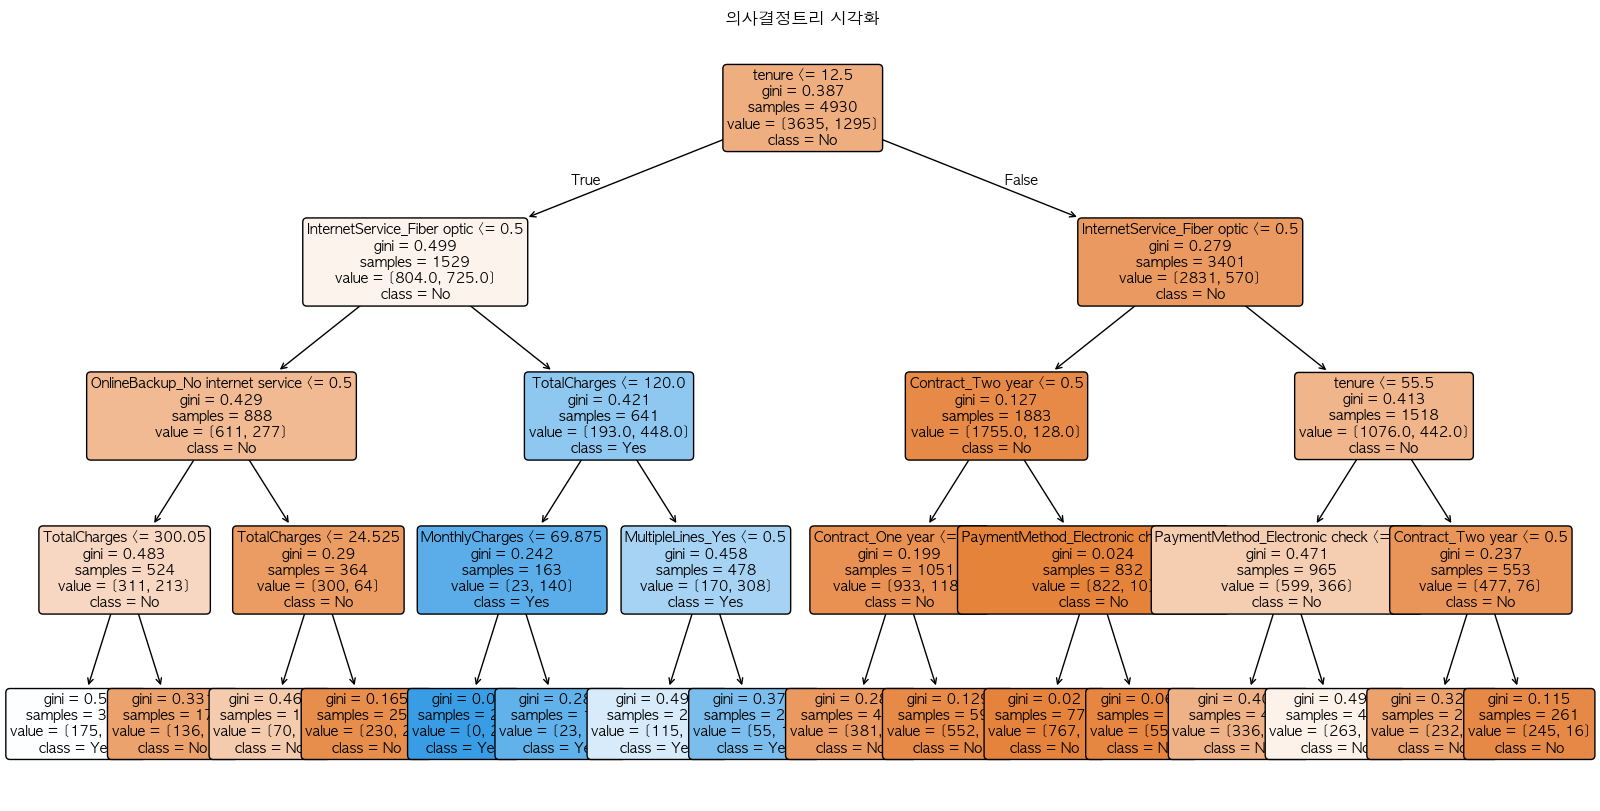

In [11]:
# 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=10)
plt.title("의사결정트리 시각화")
plt.show()

### 📌 1. 첫 분기 기준: `tenure <= 12.5`  
**질문:** 고객의 가입 기간이 12.5개월 이하인가?

- `samples = 4930` → 총 4930명의 고객
- `value = [3635, 1295]`  
  → 3635명은 이탈하지 않았고, 1295명은 이탈함
- `class = No`  
  → 이 노드에서의 최종 예측: **"이탈 안 함"**

---

### 📌 2. True 방향: 가입 기간 ≤ 12.5인 고객  
**질문:** `InternetService_Fiber optic <= 0.5` → 광랜을 사용하지 않는가?

- `samples = 1529` → 해당 조건을 만족한 고객 수
- `value = [804, 725]` → 804명은 이탈 X, 725명은 이탈
- `class = No`  
  → 여전히 이탈하지 않은 쪽이 많지만 이탈 비율이 높아짐

---

### 📌 2-1. False 방향: 가입 기간 > 12.5인 고객  
**질문:** 역시 광랜 사용 여부(`Fiber optic <= 0.5`)로 분기

- `samples = 3401`
- `value = [2831, 570]` → 이탈 비율이 상대적으로 낮음
- `class = No`  
  → 이탈하지 않은 고객이 훨씬 많음

---

### 📌 3. True → True 방향: 광랜 미사용 → 온라인 백업 미사용 여부
**질문:** `OnlineBackup_No internet service <= 0.5`  
(값이 0이면 백업 사용 중, 1이면 백업 없음)

- `samples = 888`
- `value = [611, 277]` → 277명 이탈
- `class = No`  
  → 이탈 비율 존재하지만 아직은 이탈 안한 쪽이 많음

---

- **광랜 안 쓰고 + 가입 기간 짧은 사람들**  
  → **온라인 백업 유무**, **요금 수준**이 이탈에 영향

- **광랜 안 쓰고 + 가입 오래된 사람들**  
  → **계약 기간**, **결제 방식** 등 계약적 요소가 중요하게 작용

---

### 💡 결정 트리는 ‘지역 맞춤 기준’

각 노드(지점)에서 그 구간의 데이터에 가장 적합한 **최적 분기 조건**을 자동으로 선택함.  
→ 그래서 조건들이 층마다 달라지는 것!


### 🧩 4. SVM 모델링
- `SVC` 모델을 이용해 이탈 여부를 예측하세요.
- 테스트셋에 대한 예측 결과를 출력하고, `classification_report`를 사용해 평가하세요.

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# SVM 모델 훈련
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1536
           1       0.69      0.44      0.54       574

    accuracy                           0.79      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



#### ✅ 해설: 
- `SVC(kernel='linear')`는 선형 커널을 사용하는 SVM 모델
- `fit()` 함수로 훈련 데이터를 학습하고 `predict()`로 예측
- `classification_report()`로 정밀도, 재현율, F1-score를 확인

### 🧩 5. 모델 성능 비교
- 의사결정트리와 SVM의 평가 지표(`정확도`, `정밀도`, `재현율`)를 비교하세요.
- 어떤 모델이 어떤 상황에서 더 적합한지 분석해보세요.

In [16]:
from sklearn.metrics import accuracy_score

# 결정트리 예측 및 정확도 
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# SVM 정확도 
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"의사결정트리 정확도 : {acc_dt:.4f}")
print(f"SVM 정확도: {acc_svm:.4f}")

의사결정트리 정확도 : 0.7768
SVM 정확도: 0.7938


#### ✅ 해설:
- 정확도 기준만 보면 SVM이 약간 더 우수함.
- 하지만 정확도만으로는 부족! -> 클래스 불균형(이탈/비이탈)이 존재할 경우 정밀도와 재현율도 함께 봐야 실제 분류 성능을 알 수 있음.
- 정밀도, 재현율, F1-score까지 확인해보자! 

In [17]:
#정밀도 
from sklearn.metrics import classification_report

# 예측
print("의사결정트리 분류 리포트:")
print(classification_report(y_test, y_pred_dt))

print("\nSVM 분류 리포트:")
print(classification_report(y_test, y_pred_svm))


의사결정트리 분류 리포트:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1536
           1       0.62      0.47      0.53       574

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110


SVM 분류 리포트:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1536
           1       0.69      0.44      0.54       574

    accuracy                           0.79      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



#### ✅ 개념 익히기 
- **Precision (정밀도)**: 예측한 '이탈' 중 실제 이탈 비율
- **Recall (재현율)**: 실제 이탈 중 예측에 성공한 비율
- **F1-score**: 정밀도와 재현율의 조화 평균

----

#### ✅ 성능 해석 
- 두 모델 모두 비이탈(0)에 비해 이탈(1)에서 성능이 낮음
- 이탈(1)에 대한 Precision(정밀도)는 SVM이 더 높지만, recall(재현율)은 의사결정트리가 더 높다. 

----

#### 🎯  추천 모델 판단 기준! 
- **이탈 고객을 얼마나 놓치지 않고 잡는지가 중요하다**면 -> 재현율이 높은 결정트리가 적합 
  1. 이탈 고객을 놓치면 큰 손해일 때 ex) 통신사, 정기구독 서비스 등에서 고객이 한 번 이탈하면 복구가 어려운 산업
  -> 최대한 이탈 고객을 미리 알아내서 혜택/할인 제공으로 붙잡기 

- **이탈이라고 예측했을 때 실제로 이탈한 비율이 더 중요하다**면 -> 정밀도가 높은 SVM이 적합 
  1. 이탈이라고 잘못 예측해서 자원 낭비하면 안될 때 ex) 이탈 예측 고객에게 고가의 혜택 마케팅 제공
  -> 불필요한 비용을 줄이기 


### 🧩 6. 사용자 입력 기반 예측 (선택)
- 새로운 고객의 정보를 입력받아 모델이 이탈 가능성을 예측하도록 구성해보세요.

In [18]:
# 예시 입력
sample = X_test.iloc[0:1]

print('sample =', sample)

# 예측 결과
pred_dt = dt_model.predict(sample)[0]
pred_svm = svm_model.predict(sample)[0]

print("입력 샘플 예측 결과:")
print(f"의사결정트리: {'이탈' if pred_dt else '유지'}")
print(f"SVM: {'이탈' if pred_svm else '유지'}")


sample =      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
185              0       1            24.8          24.8        False   

     Partner_Yes  Dependents_Yes  PhoneService_Yes  \
185         True           False             False   

     MultipleLines_No phone service  MultipleLines_Yes  ...  \
185                            True              False  ...   

     StreamingTV_No internet service  StreamingTV_Yes  \
185                            False            False   

     StreamingMovies_No internet service  StreamingMovies_Yes  \
185                                False                False   

     Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
185              False              False                  True   

     PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
185                                  False                            True   

     PaymentMethod_Mailed check  
185                       False  

[

# 부록: 의사결정트리 시각화 예제(iris dataset)

In [19]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [ ]:
from sklearn import tree
#모델의 분기 기준을 글자 기반 구조로 출력 
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



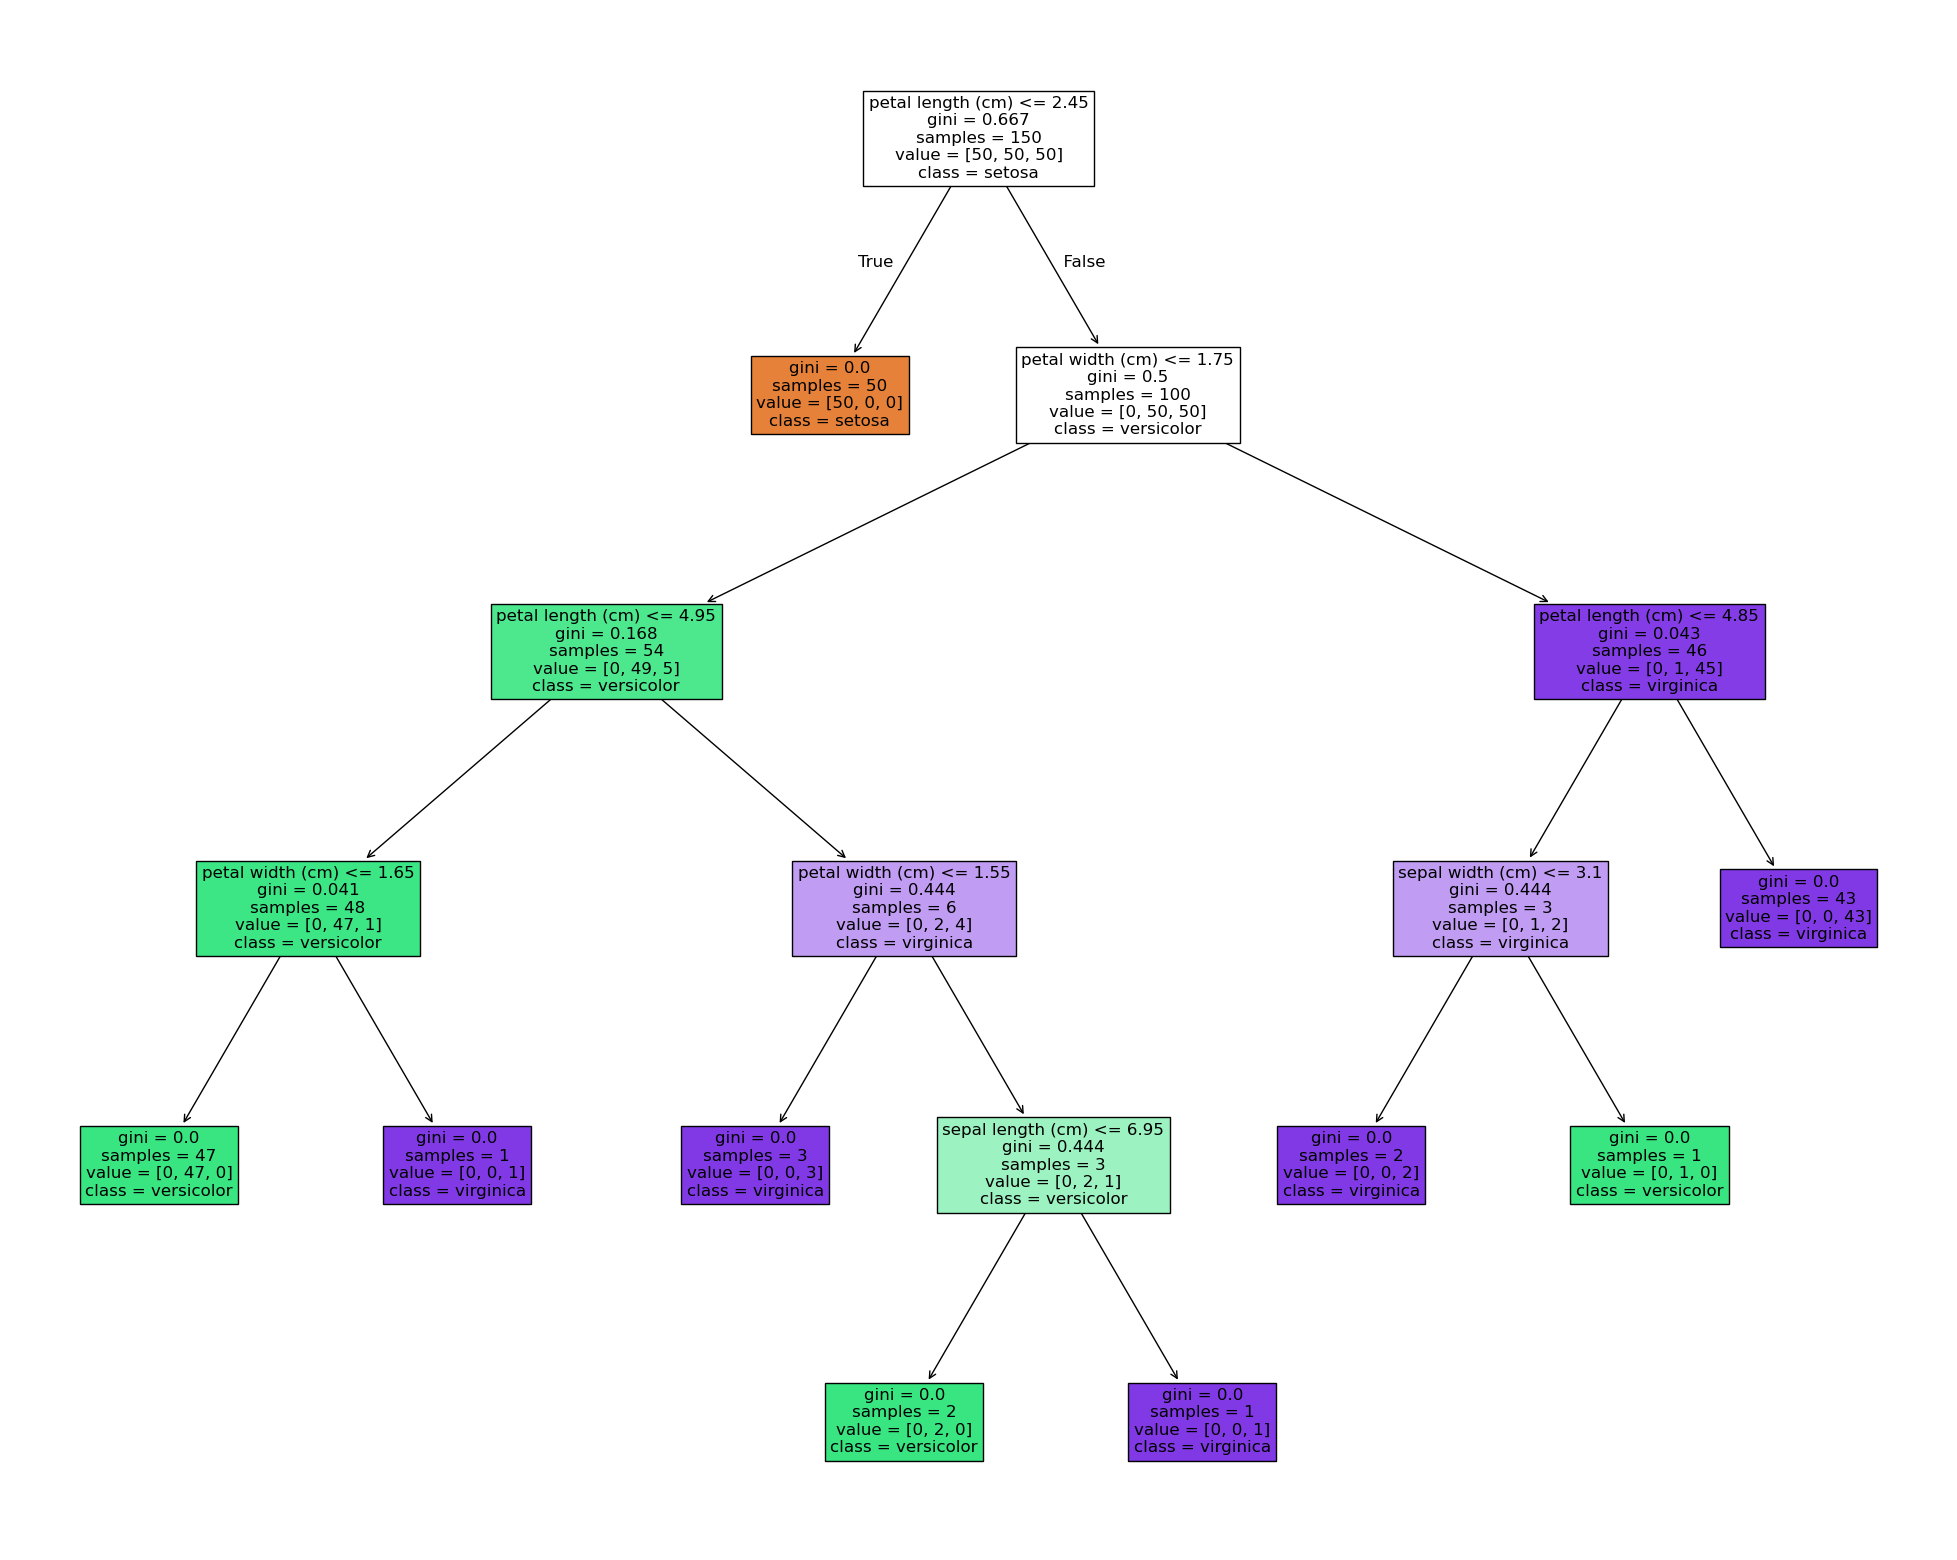

In [6]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True,
                   fontsize=12)